In [ ]:
# Author: Binan Zhang
# This file uses unemployment rate data and poverty rate data to analyze their impacts on the eviction rate for all municipalities in MA
# and for municipalities of different population brackets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read poverty data
poverty = pd.read_csv('ACSST5Y2019CITY.csv')
poverty = poverty[['NAME','S1701_C03_001E']]

# Clean City Name
def name_transform(x:str):
    x = x.replace(', Massachusetts', '')
    x = x.replace(' CDP', '')
    x = x.replace(' Center', '')
    x = x.replace(' Town', '')
    x = x.replace(' city', '')
    return x

# cleaning
poverty['NAME'] = poverty['NAME'].apply(name_transform)
poverty = poverty.rename(columns={'NAME':'Muni', 'S1701_C03_001E':'Poverty Rate'}).drop([0])

# read eviction data
eviction = pd.read_csv('eviction_with_geographic.csv')
eviction = eviction[['Muni', 'Evictions per Rented Households', 'Estimate!!Total:']].rename(columns={'Evictions per Rented Households':'Eviction Rate', 'Estimate!!Total:':'Total Population'})

# change eviction rate to percentage
eviction['Eviction Rate'] = eviction['Eviction Rate']*100

# join
joined_poverty = eviction.merge(poverty, on='Muni', how='left')

# drop those without poverty rate
joined_poverty = joined_poverty.dropna(subset=['Poverty Rate'])

# change poverty rate to float
joined_poverty['Poverty Rate'] = joined_poverty['Poverty Rate'].astype(float)

joined_poverty

,Muni,Eviction Rate,Total Population,Poverty Rate
0,Worcester,8.906391,185143,20.0
1,Springfield,9.911945,154139,26.9
2,Fall River,9.613815,89388,19.7
3,New Bedford,9.812943,95239,20.3
4,Lowell,7.654429,111306,19.0
...,...,...,...,...
290,Chester,1.818182,1470,13.2
296,East Brookfield,1.612903,2040,6.1
299,Topsfield,0.938967,6568,7.8
302,Petersham,2.985075,1188,4.3


<function matplotlib.pyplot.show(close=None, block=None)>

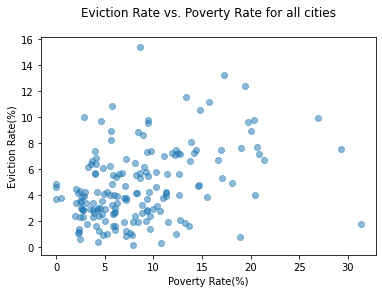

In [20]:
# plot Eviction Rate vs. Poverty Rate for all cities
plt.scatter(joined_poverty['Poverty Rate'], joined_poverty['Eviction Rate'], alpha=0.5)
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Poverty Rate for all cities\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

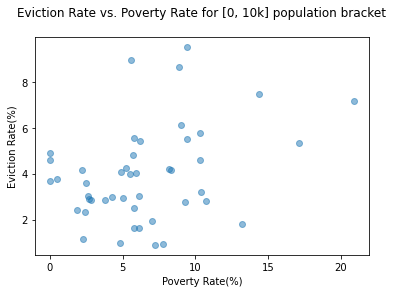

In [15]:
# plot Eviction Rate vs. Poverty Rate for <10k population bracket
joined_poverty_LT_10k = joined_poverty[joined_poverty['Total Population'] < 10000]
plt.scatter(joined_poverty_LT_10k['Poverty Rate'], joined_poverty_LT_10k['Eviction Rate'], alpha=0.5)
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Poverty Rate for cities in [0, 10k] population bracket\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

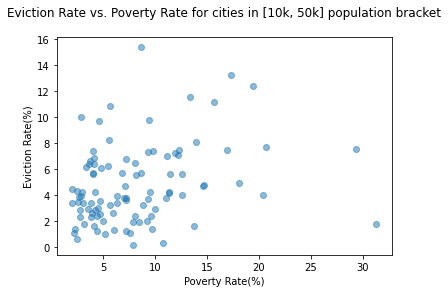

In [22]:
# plot Eviction Rate vs. Poverty Rate for [10k, 50k] population bracket
joined_poverty_10k_to_50k = joined_poverty[(joined_poverty['Total Population'] >= 10000) & (joined_poverty['Total Population'] < 50000)]
plt.scatter(joined_poverty_10k_to_50k['Poverty Rate'], joined_poverty_10k_to_50k['Eviction Rate'], alpha=0.5)
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Poverty Rate for cities in [10k, 50k] population bracket\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

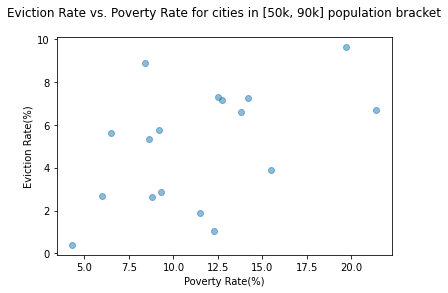

In [21]:
# plot Eviction Rate vs. Poverty Rate for [50k, 90k] population bracket
joined_poverty_50k_to_90k = joined_poverty[(joined_poverty['Total Population'] >= 50000) & (joined_poverty['Total Population'] < 90000)]
plt.scatter(joined_poverty_50k_to_90k['Poverty Rate'], joined_poverty_50k_to_90k['Eviction Rate'], alpha=0.5)
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Poverty Rate for cities in [50k, 90k] population bracket\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

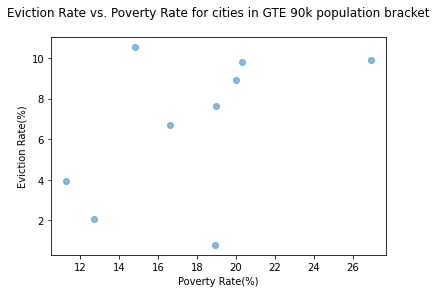

In [36]:
# plot Eviction Rate vs. Poverty Rate for GTE 90k population bracket
joined_poverty_GTE_90k = joined_poverty[joined_poverty['Total Population'] >= 90000]
plt.scatter(joined_poverty_GTE_90k['Poverty Rate'], joined_poverty_GTE_90k['Eviction Rate'], alpha=0.5)
plt.xlabel('Poverty Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Poverty Rate for cities in GTE 90k population bracket\n')
plt.show

In [25]:
# read unemploy data
unemploy = pd.read_excel('Unemployment_2020.xls')
unemploy = unemploy[['Municipality', 'Unemployment Rate']].rename(columns={'Municipality':'Muni'})

# join
joined_unemploy = eviction.merge(unemploy, on='Muni', how='left')

# drop those without unemployment rate
joined_unemploy = joined_unemploy.dropna(subset=['Unemployment Rate'])

#sns.lmplot(x='Unemployment Rate', y='Eviction Rate', data=joined, ci=None)
joined_unemploy


,Muni,Eviction Rate,Total Population,Unemployment Rate
0,Worcester,8.906391,185143,8.39
1,Springfield,9.911945,154139,11.87
2,Fall River,9.613815,89388,8.56
3,New Bedford,9.812943,95239,9.11
4,Lowell,7.654429,111306,7.98
...,...,...,...,...
313,Whately,0.925926,1584,2.86
314,Goshen,2.040816,913,3.74
315,Freetown,0.333333,9299,5.91
316,Blandford,4.166667,1105,5.42


<function matplotlib.pyplot.show(close=None, block=None)>

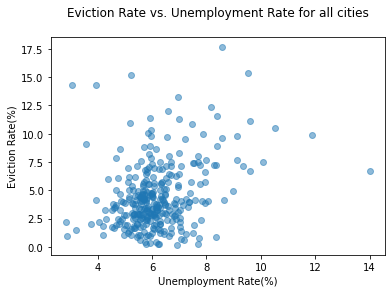

In [28]:
# plot Eviction Rate vs. Unemployment Rate for all cities
plt.scatter(joined_unemploy['Unemployment Rate'], joined_unemploy['Eviction Rate'], alpha=0.5)
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Unemployment Rate for all cities\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

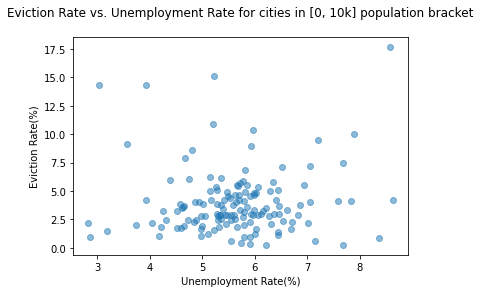

In [29]:
# plot Eviction Rate vs. Unemployment Rate for cities in <10k population bracket
joined_unemploy_LT_10k = joined_unemploy[joined_unemploy['Total Population'] < 10000]
plt.scatter(joined_unemploy_LT_10k['Unemployment Rate'], joined_unemploy_LT_10k['Eviction Rate'], alpha=0.5)
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Unemployment Rate for cities in [0, 10k] population bracket\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

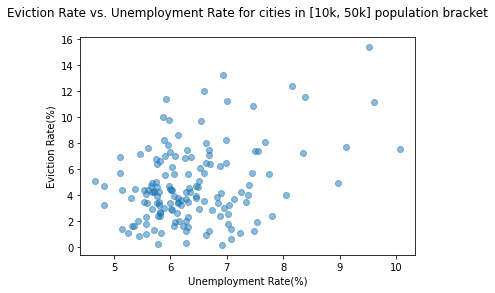

In [30]:
# plot Eviction Rate vs. Unemployment Rate for cities in [10k, 50k] population bracket
joined_unemploy_10k_to_50k = joined_unemploy[(joined_unemploy['Total Population'] >= 10000) & (joined_unemploy['Total Population'] < 50000)]
plt.scatter(joined_unemploy_10k_to_50k['Unemployment Rate'], joined_unemploy_10k_to_50k['Eviction Rate'], alpha=0.5)
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Unemployment Rate for cities in [10k, 50k] population bracket\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

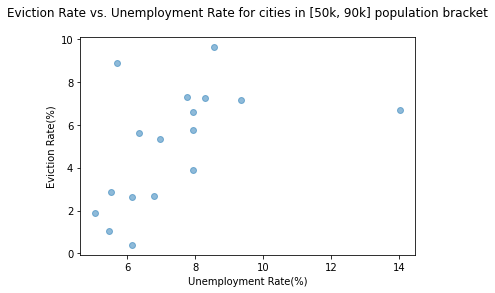

In [34]:
# plot Eviction Rate vs. Unemployment Rate for cities in [50k, 90k] population bracket
joined_unemploy_50k_to_90k = joined_unemploy[(joined_unemploy['Total Population'] >= 50000) & (joined_unemploy['Total Population'] < 90000)]
plt.scatter(joined_unemploy_50k_to_90k['Unemployment Rate'], joined_unemploy_50k_to_90k['Eviction Rate'], alpha=0.5)
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Unemployment Rate for cities in [50k, 90k] population bracket\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

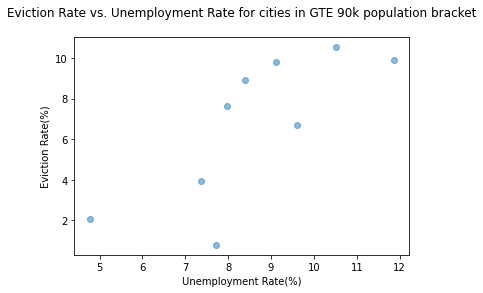

In [37]:
# plot Eviction Rate vs. Unemployment Rate for cities in GTE 90k population bracket
joined_unemploy_GTE_90k = joined_unemploy[joined_unemploy['Total Population'] >= 90000]
plt.scatter(joined_unemploy_GTE_90k['Unemployment Rate'], joined_unemploy_GTE_90k['Eviction Rate'], alpha=0.5)
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Eviction Rate(%)')
plt.title('Eviction Rate vs. Unemployment Rate for cities in GTE 90k population bracket\n')
plt.show